# Sentiment analysis 

### Imports

In [8]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

Nombre de documents chargés : 999
Documents après filtrage : 993


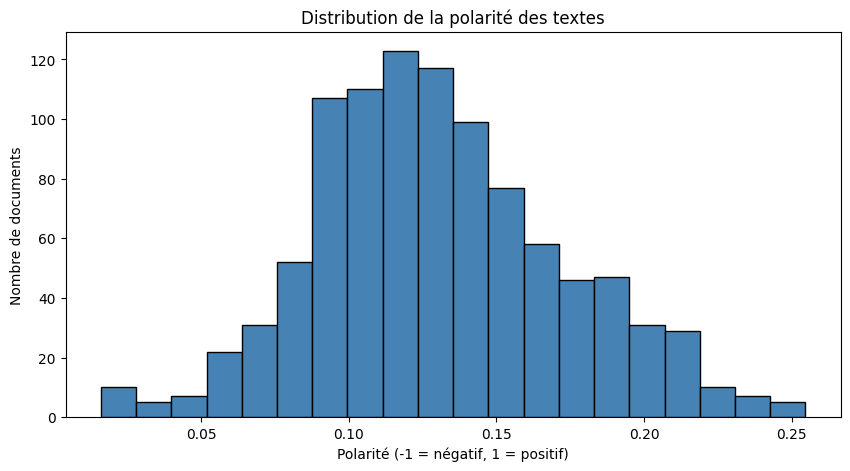

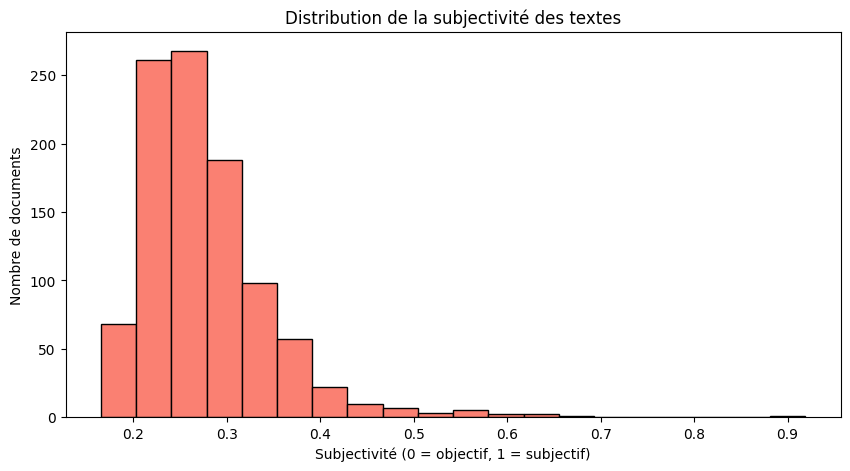

   polarity  subjectivity                                               text
0  0.045118      0.229693  samedi janvier le som conseil de guerre de bru...
1  0.132711      0.226194   le soir fantaisies d actualité l e ballet des...
2  0.137265      0.343203   le soir samedi fevrier w vr xi p l île aux ai...
3  0.221613      0.275444  vendredi mars les le s o ir acropole s le roi ...
4  0.250608      0.411003  samedi mars le soir les theatres monnaie samed...


In [1]:
# --- Imports ---
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

# --- Configuration ---
data_path = "../../data/txt_tp4/"  # dossier contenant tes fichiers .txt

# --- Chargement des textes ---
files = sorted([f for f in os.listdir(data_path) if f.endswith(".txt")])
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read() for f in files]
print(f"Nombre de documents chargés : {len(texts)}")

# --- Filtrage simple (optionnel) ---
def matches_query(text):
    text_lower = text.lower()
    cond1 = "sorcière" in text_lower or "sorciere" in text_lower
    cond2 = bool(re.search(r"\bfemm\w*|\bfémin\w*", text_lower))
    return cond1 and cond2

filtered_texts = [t for t in texts if matches_query(t)]
print(f"Documents après filtrage : {len(filtered_texts)}")

# --- Nettoyage simple (optionnel) ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

cleaned_texts = [clean_text(t) for t in filtered_texts]

# --- Initialisation TextBlob ---
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# --- Fonction d'analyse de sentiment ---
def get_sentiment(text):
    blob = tb(text)
    polarity, subjectivity = blob.sentiment
    return polarity, subjectivity

# --- Analyse des sentiments sur tout le corpus ---
results = [get_sentiment(t) for t in cleaned_texts]
df_sentiment = pd.DataFrame(results, columns=["polarity", "subjectivity"])
df_sentiment["text"] = cleaned_texts

# --- Visualisation ---
plt.figure(figsize=(10,5))
plt.hist(df_sentiment["polarity"], bins=20, color="steelblue", edgecolor="black")
plt.title("Distribution de la polarité des textes")
plt.xlabel("Polarité (-1 = négatif, 1 = positif)")
plt.ylabel("Nombre de documents")
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_sentiment["subjectivity"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution de la subjectivité des textes")
plt.xlabel("Subjectivité (0 = objectif, 1 = subjectif)")
plt.ylabel("Nombre de documents")
plt.show()

# --- Aperçu des résultats ---
print(df_sentiment.head())


In [3]:
# Imports essentiels
import os
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import matplotlib.pyplot as plt

# Configuration TextBlob FR
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# Chemin vers ton corpus filtré / nettoyé (ex : clean_texts du clustering)
data_path = "../../data/txt_tp4/"
files = sorted([f for f in os.listdir(data_path) if f.endswith(".txt")])
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read() for f in files]

print("Nombre de documents chargés :", len(texts))


Nombre de documents chargés : 999


In [4]:
# Fonction d'analyse de sentiment
def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    return polarity, subjectivity

# Test rapide
p, s = get_sentiment("Ce journal est vraiment super intéressant.")
print(f"Polarity: {p:.3f}, Subjectivity: {s:.3f}")


Polarity: 0.650, Subjectivity: 0.750


In [5]:
# Analyse de tout le coa
# Création d'un DataFrame pour stocker les résultats
df_sentiments = pd.DataFrame({
    "text": texts
})

# Calcul polarity et subjectivity
df_sentiments["polarity"], df_sentiments["subjectivity"] = zip(*df_sentiments["text"].map(get_sentiment))

# Aperçu
print(df_sentiments.head())


                                                text  polarity  subjectivity
0  SAMEDI 20 JANVIER 1951 - - LE som CONSEIL DE G...  0.045670      0.231531
1  20 LE SOIR Fantaisies d’actualité * L E ballet...  0.134023      0.225551
2  18 • LE SOIR SAMEDI 24 FEVRIER 1951 w*.*'**'- ...  0.143796      0.347275
3  VENDREDI 23 MARS 1951 LES LE S O IR ACROPOLE s...  0.218903      0.276805
4  SAMEDI 24 MARS 1951 « LE SOIR 9 LES THEATRES M...  0.255164      0.419952


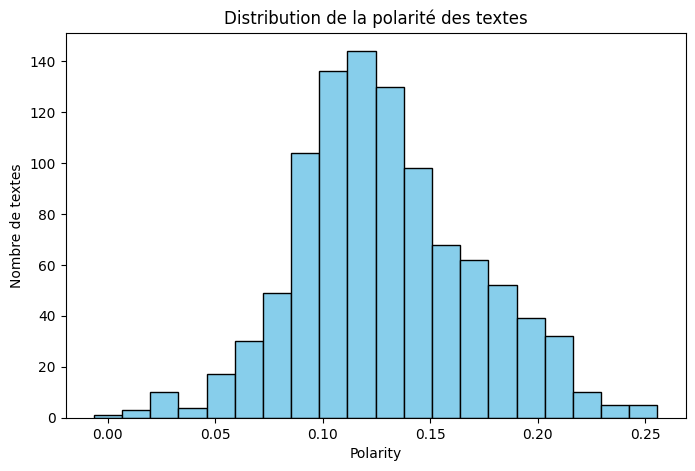

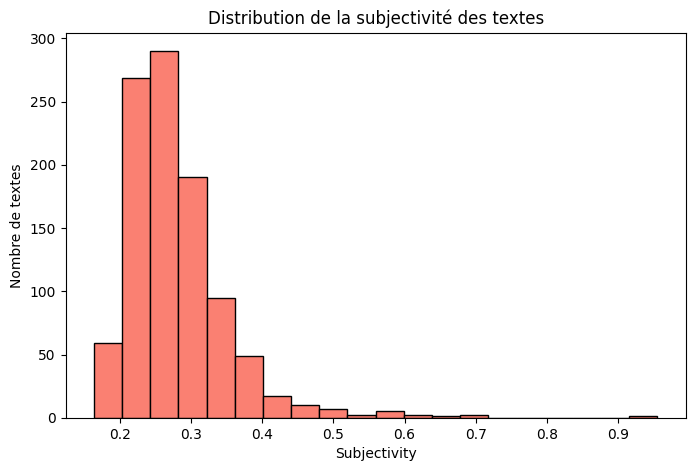

In [6]:
# visualisatioin generale
# Histogramme des polarities
plt.figure(figsize=(8,5))
plt.hist(df_sentiments["polarity"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution de la polarité des textes")
plt.xlabel("Polarity")
plt.ylabel("Nombre de textes")
plt.show()

# Histogramme des subjectivities
plt.figure(figsize=(8,5))
plt.hist(df_sentiments["subjectivity"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution de la subjectivité des textes")
plt.xlabel("Subjectivity")
plt.ylabel("Nombre de textes")
plt.show()


In [27]:
# Imports
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer


In [28]:
data_path = "../../data/txt_tp4/"

files = sorted([f for f in os.listdir(data_path) if f.endswith(".txt")])
texts = [open(os.path.join(data_path, f),"r",encoding="utf-8").read()
         for f in files]

def matches_query(text):
    txt = text.lower()
    cond1 = "sorcière" in txt or "sorciere" in txt
    cond2 = bool(re.search(r"\bfemm\w*|\bfémin\w*", txt))
    return cond1 and cond2

filtered = [(f,t) for f,t in zip(files,texts) if matches_query(t)]

print("Documents filtrés :", len(filtered))


Documents filtrés : 993


### Nettoyage léger 

In [29]:
def is_noise(text):
    if len(re.findall(r"\d{3,}", text)) > 30: return True
    if len(re.findall(r"\b\d{2}h\d{2}\b|\b\d{4}\b", text)) > 20: return True
    return False

clean_docs = [(f,t) for f,t in filtered if not is_noise(t)]
print("Documents utilisés pour les sentiments :", len(clean_docs))


Documents utilisés pour les sentiments : 320


### Fonction d’analyse des sentiments

In [30]:
def sentiment_scores(text):
    blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    polarity, subjectivity = blob.sentiment
    return polarity, subjectivity


### Application du modèle de sentiments

In [31]:
sent_data = []

for fname, txt in clean_docs:
    pol, subj = sentiment_scores(txt)
    sent_data.append([fname, pol, subj])

df_sent = pd.DataFrame(sent_data, columns=["fichier", "polarity", "subjectivity"])
df_sent.head()


,fichier,polarity,subjectivity
0,KB_JB838_1951-01-20_01-00005.txt,0.045670,0.231531
1,KB_JB838_1951-02-04_01-00020.txt,0.134023,0.225551
2,KB_JB838_1951-05-11_01-00002.txt,0.072686,0.234284
3,KB_JB838_1951-06-09_01-00001.txt,0.078564,0.206599
4,KB_JB838_1951-06-15_01-00010.txt,0.188309,0.322500


#### Extraction date / source

In [35]:
import re

def extract_info(filename):
    """
    Extrait le journal et l'année d'un fichier KB.
    Format attendu : KB_<journalCode>_<YYYY-MM-DD>_....txt
    """
    name = filename.replace(".txt", "")
    parts = name.split("_")

    # Journal : 2e partie si elle existe
    journal = parts[1] if len(parts) > 1 else None

    # Année : extraire à partir de la 3e partie si elle existe et contient un pattern YYYY-MM-DD
    year = None
    if len(parts) > 2:
        match = re.match(r"(\d{4})-\d{2}-\d{2}", parts[2])
        if match:
            year = int(match.group(1))

    return journal, year


### Statistiques globales

         polarity  subjectivity
count  320.000000    320.000000
mean     0.120966      0.292103
std      0.034391      0.081108
min      0.017950      0.173059
25%      0.099067      0.247802
50%      0.120778      0.279102
75%      0.139993      0.315341
max      0.244242      0.955172


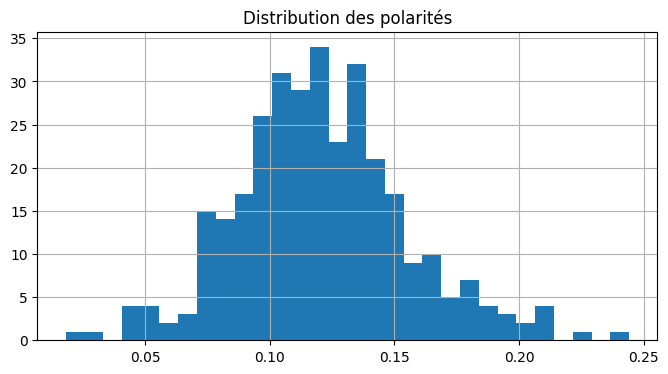

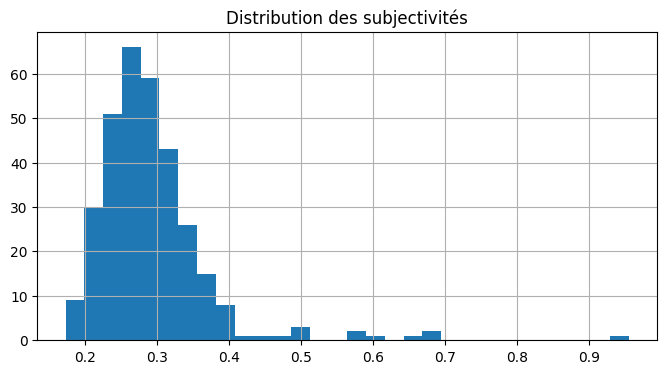

In [36]:
print(df_sent.describe())
df_sent["polarity"].hist(bins=30, figsize=(8,4))
plt.title("Distribution des polarités")
plt.show()

df_sent["subjectivity"].hist(bins=30, figsize=(8,4))
plt.title("Distribution des subjectivités")
plt.show()


In [40]:
df_sent["journal"], df_sent["year"] = zip(*df_sent["fichier"].apply(extract_info))
df_sent.head()


,fichier,polarity,subjectivity,journal,year
0,KB_JB838_1951-01-20_01-00005.txt,0.045670,0.231531,JB838,1951
1,KB_JB838_1951-02-04_01-00020.txt,0.134023,0.225551,JB838,1951
2,KB_JB838_1951-05-11_01-00002.txt,0.072686,0.234284,JB838,1951
3,KB_JB838_1951-06-09_01-00001.txt,0.078564,0.206599,JB838,1951
4,KB_JB838_1951-06-15_01-00010.txt,0.188309,0.322500,JB838,1951


### Analyse temporelle

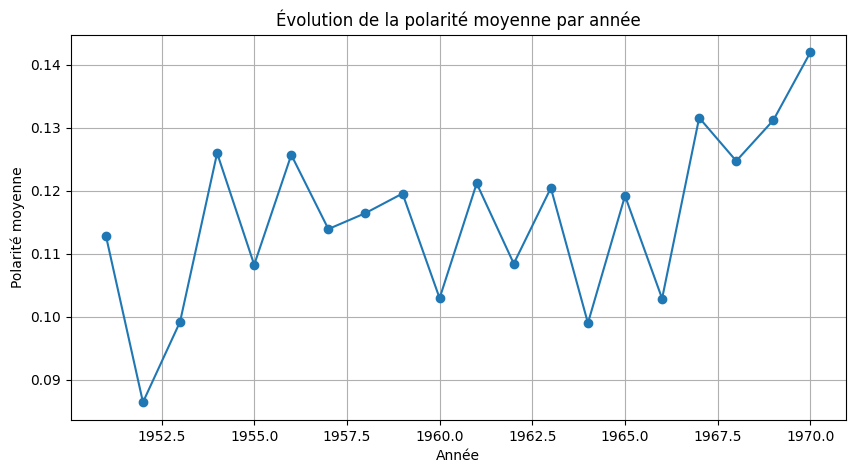

In [48]:
df_year_clean = df_sent.dropna(subset=["year"])
df_year = df_year_clean.groupby("year")["polarity"].mean().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_year.index, df_year.values, marker='o', linestyle='-')
plt.title("Évolution de la polarité moyenne par année")
plt.xlabel("Année")
plt.ylabel("Polarité moyenne")
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

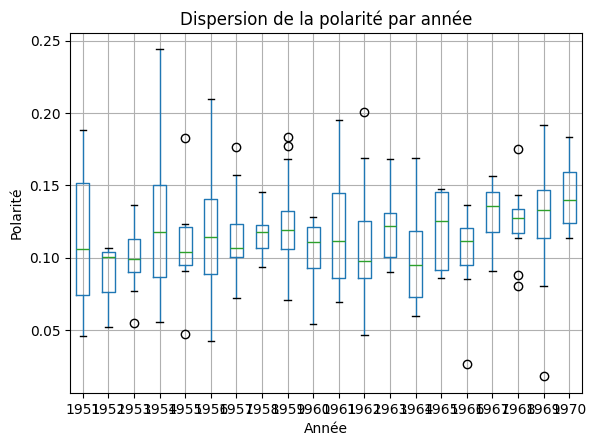

<Figure size 1200x600 with 0 Axes>

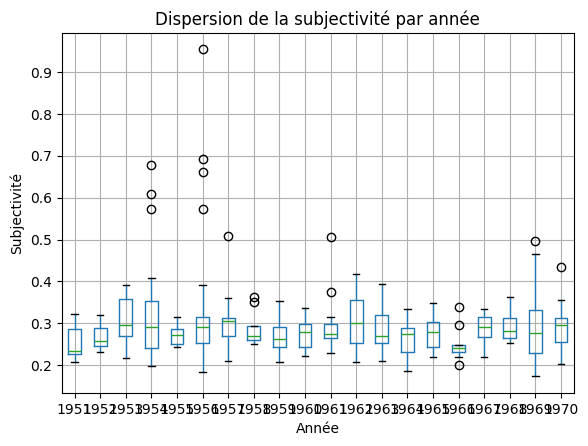

In [49]:
# boxplot par année pour visualiser la dispersion
df_year_clean = df_sent.dropna(subset=["year"])
df_year = df_year_clean.groupby("year")["polarity"].mean().sort_index()

#Ajouter un boxplot par année pour voir la dispersion
plt.figure(figsize=(12,6))
df_year_clean.boxplot(column="polarity", by="year", grid=True)
plt.title("Dispersion de la polarité par année")
plt.suptitle("")
plt.xlabel("Année")
plt.ylabel("Polarité")
plt.show()
# même chose por la subjectivité
plt.figure(figsize=(12,6))
df_year_clean.boxplot(column="subjectivity", by="year", grid=True)
plt.title("Dispersion de la subjectivité par année")
plt.suptitle("")
plt.xlabel("Année")
plt.ylabel("Subjectivité")
plt.show()


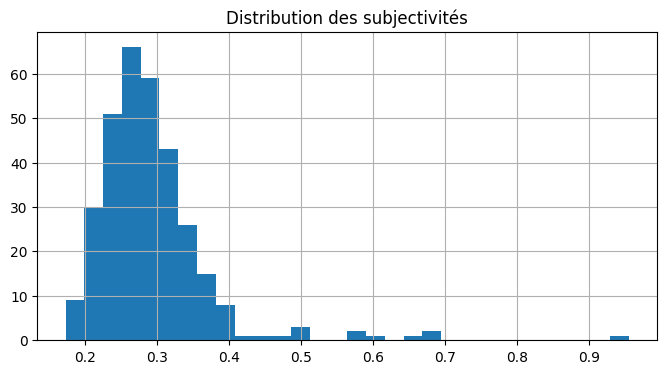

In [50]:
#Vérifier la distribution des subjectivités 
df_sent["subjectivity"].hist(bins=30, figsize=(8,4))
plt.title("Distribution des subjectivités")
plt.show()


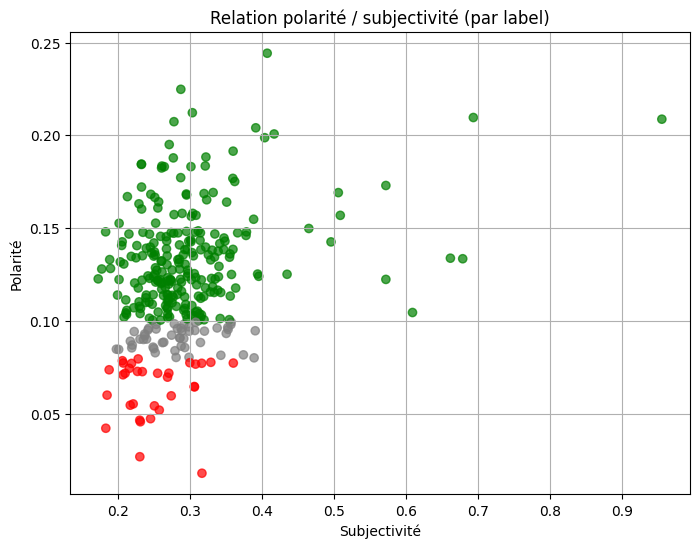

In [51]:
plt.figure(figsize=(8,6))
colors = df_sent["label"].map({"positif":"green","neutre":"gray","négatif":"red"})
plt.scatter(df_sent["subjectivity"], df_sent["polarity"], c=colors, alpha=0.7)
plt.xlabel("Subjectivité")
plt.ylabel("Polarité")
plt.title("Relation polarité / subjectivité (par label)")
plt.grid(True)
plt.show()


### Documents les plus positifs / négatifs

In [52]:
print("Top 10 articles les plus positifs :")
print(df_sent.sort_values("polarity", ascending=False).head(10))

print("\nTop 10 articles les plus négatifs :")
print(df_sent.sort_values("polarity", ascending=True).head(10))


Top 10 articles les plus positifs :
                              fichier  polarity  subjectivity journal  year  \
46   KB_JB838_1954-12-19_01-00012.txt  0.244242      0.407556   JB838  1954   
47   KB_JB838_1954-12-22_01-00010.txt  0.224797      0.287703   JB838  1954   
43   KB_JB838_1954-12-03_01-00010.txt  0.212193      0.303684   JB838  1954   
63   KB_JB838_1956-04-27_01-00014.txt  0.209600      0.693600   JB838  1956   
78   KB_JB838_1956-12-07_01-00014.txt  0.208707      0.955172   JB838  1956   
76   KB_JB838_1956-11-30_01-00012.txt  0.207359      0.278169   JB838  1956   
80   KB_JB838_1956-12-20_01-00014.txt  0.204056      0.391689   JB838  1956   
161  KB_JB838_1962-08-10_01-00012.txt  0.200734      0.417177   JB838  1962   
44   KB_JB838_1954-12-07_01-00010.txt  0.198732      0.404076   JB838  1954   
154  KB_JB838_1961-12-06_01-00013.txt  0.195039      0.271622   JB838  1961   

       label  
46   positif  
47   positif  
43   positif  
63   positif  
78   positif  
76  

### Visualisation scatter polartié/subjectivité

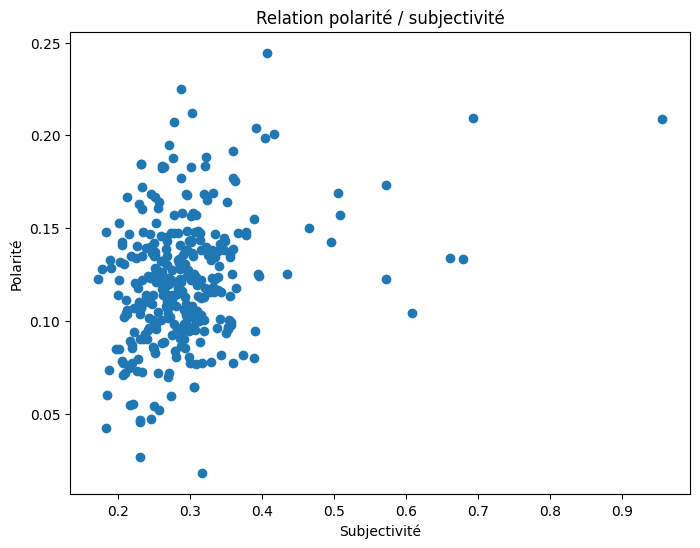

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df_sent["subjectivity"], df_sent["polarity"])
plt.xlabel("Subjectivité")
plt.ylabel("Polarité")
plt.title("Relation polarité / subjectivité")
plt.show()


In [54]:
# categorier les sentiments 
def label_sentiment(p):
    if p > 0.1: 
        return "positif"
    elif p < 0.08:  # seuil plus léger pour détecter le négatif
        return "négatif"
    else: 
        return "neutre"


df_sent["label"] = df_sent["polarity"].apply(label_sentiment)
df_sent["label"].value_counts()


label
positif    238
neutre      50
négatif     32
Name: count, dtype: int64

In [55]:
# exporter les resulata
df_sent.to_csv("sentiment_analysis_results.csv", index=False)
